# Data and marriage

The dataset used here is the affairs dataset that comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy. IT is a SOCIAL DATASET

Description of Variables
The dataset contains 6366 observations of 9 variables:

* rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
* age: woman's age
* yrs_married: number of years married
* children: number of children
* religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
* educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
* occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
* occupation_husb: husband's occupation (same coding as above)
* affairs: time spent in extra-marital affairs

Problem Statement
I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman.



In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

#### Data Pre-Processing First, let's load the dataset and add a binary affair column.

In [2]:
# load dataset
dta = sm.datasets.fair.load_pandas().data

# add "affair" column: 1 represents having affairs, 0 represents not
# se convierte una variable continua en una variable categorica, true o false
dta['affair'] = (dta.affairs > 0).astype(int)

#### Data Exploration

In [3]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


We can see that on average, women who have affairs rate their marriages lower, which is to be expected.
Let's take another look at the rate_marriage variable.

In [4]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


An increase in age, yrs_married, and children appears to correlate with a declining marriage rating.

In [32]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6366 entries, 0 to 6365
Data columns (total 10 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affairs            6366 non-null float64
affair             6366 non-null int64
dtypes: float64(9), int64(1)
memory usage: 547.1 KB


#### Summarizing Data

In [33]:
#splitting the data by affair 
dtagrouping = dta.groupby('affair')
dtagrouping['occupation'].describe()

affair       
0       count    4313.000000
        mean        3.405286
        std         0.930512
        min         1.000000
        25%         3.000000
        50%         3.000000
        75%         4.000000
        max         6.000000
1       count    2053.000000
        mean        3.463712
        std         0.965927
        min         1.000000
        25%         3.000000
        50%         3.000000
        75%         4.000000
        max         6.000000
dtype: float64

No Insight from this 

#### Plotting and Charting

In [34]:
# show plots in the notebook
%matplotlib inline

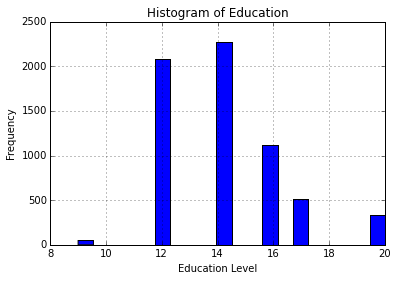

In [35]:
# histogram of education
dta.educ.hist(bins=20)
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

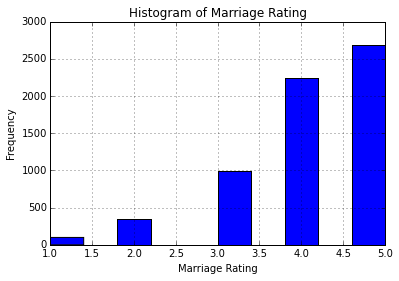

In [9]:
# histogram of marriage rating
dta.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

#### Let's take a look at the distribution of marriage ratings for those having affairs versus those not having affairs.

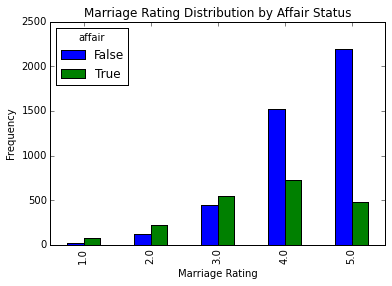

In [36]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')
#Women who had affairs rated their marriage lower

#### Let's use a stacked barplot to look at the percentage of women having affairs by number of years of marriage.

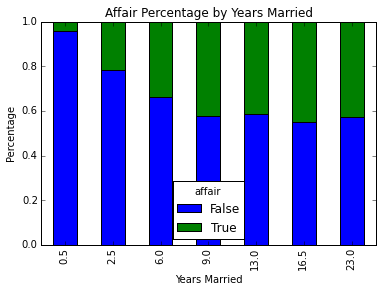

In [37]:
affair_yrs_married = pd.crosstab(dta.yrs_married, dta.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')
#There were a greater proportion of people (80%) within 2.5 years of marriage, who reported having an affair 

/Users/msicilia/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from IPython.kernel.zmq import kernelapp as app


{'boxes': [<matplotlib.lines.Line2D at 0x10bc81dd0>],
 'caps': [<matplotlib.lines.Line2D at 0x10bc91c90>,
 'fliers': [<matplotlib.lines.Line2D at 0x10bc9cf90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10bc9c950>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10bc91090>,
  <matplotlib.lines.Line2D at 0x10bc91650>]}

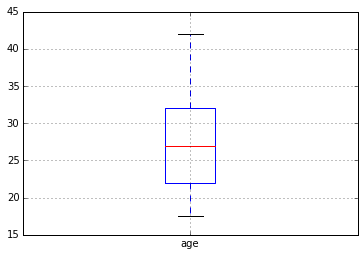

In [38]:
#Box Plot for age
dta.boxplot(column='age')
#We will keep the outliers as removing them could mean losing out on information-will remove only when they
#adversly impacting the model


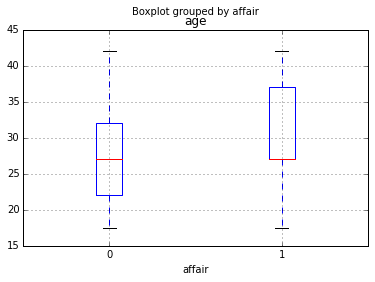

In [40]:
#NEW Boxplot for Age
dta.boxplot(column='age', by='affair')

#### TESTS OF COMPARISON  Mann-Whitney-Wilcoxon (MWW) RankSum test.  The MWW RankSum test is a useful test to determine if two distributions are significantly different or not.  Unlike the t-test, the RankSum test does not assume that the data are normally distributed,  potentially providing a more accurate assessment of the data sets.

In [42]:
#Comparison of Age by affair
from scipy import stats  
affair_goods = dta[dta['affair'] == 1]['age']
affair_bads = dta[dta['affair'] == 0]['age']
z_stat, p_val = stats.ranksums(affair_goods, affair_bads)
print "P value =", p_val
#The Average Age of people having affair' is significantly different from 'the ones not having affair'

P value = 7.27593833131e-35


In [43]:
#Comparison of yrs_married by affair
from scipy import stats  
affair_goods_yrs = dta[dta['affair'] == 1]['yrs_married']
affair_bads_yrs = dta[dta['affair'] == 0]['yrs_married']
z_stat, p_val = stats.ranksums(affair_goods_yrs, affair_bads_yrs)
print "P value =", p_val
#The Average Marraige Length of people having affair' is significantly different from 'the ones not having affair'

P value = 3.93883383292e-73


### Model Development

In [16]:
#checking correlations
dta.corr()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.178068,-0.331776
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,-0.089964,0.146519
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,-0.087737,0.203109
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,-0.070278,0.159833
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.125933,-0.129299
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.017740,-0.075280
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.004469,0.028981
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,-0.015614,0.017637
affairs,-0.178068,-0.089964,-0.087737,-0.070278,-0.125933,-0.017740,0.004469,-0.015614,1.000000,0.464046
affair,-0.331776,0.146519,0.203109,0.159833,-0.129299,-0.075280,0.028981,0.017637,0.464046,1.000000


#### Prepare Data for Logistic Regression To prepare the data, I want to add an intercept column as well as dummy variables for occupation and occupation_husb, since I'm treating them as categorial variables.  The dmatrices function from the patsy module can do that using formula language.

In [44]:
# create dataframes with an intercept column and dummy variables for
# occupation and occupation_husb
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  dta, return_type="dataframe")
print X.columns

Index([u'Intercept', u'C(occupation)[T.2.0]', u'C(occupation)[T.3.0]',
       u'C(occupation)[T.4.0]', u'C(occupation)[T.5.0]',
       u'C(occupation)[T.6.0]', u'C(occupation_husb)[T.2.0]',
       u'C(occupation_husb)[T.3.0]', u'C(occupation_husb)[T.4.0]',
       u'C(occupation_husb)[T.5.0]', u'C(occupation_husb)[T.6.0]',
       u'rate_marriage', u'age', u'yrs_married', u'children', u'religious',
       u'educ'],
      dtype='object')


#### The column names for the dummy variables are ugly, so let's rename those.

In [45]:
# fix column names of X
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

We also need to flatten y into a 1-D array, so that scikit-learn will properly understand it as the response variable.

In [46]:
# flatten y into a 1-D array
y = np.ravel(y)

##### Logistic Regression Let's go ahead and run logistic regression on the entire data set, and see how accurate it is!

In [47]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.72588752748978946

0.72588752748978946
73% accuracy seems good, but let us check for the null error rate

In [48]:
# what percentage had affairs?
y.mean()

0.32249450204209867

Only 32% of the women had affairs, which means that you could obtain 68% accuracy by always predicting "no". 
So we're doing better than the null error rate, but not by much. 
Let's examine the coefficients to see what we learn.

In [49]:
# examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,[1.48988384764]
1,occ_2,[0.188045687191]
2,occ_3,[0.498926468816]
3,occ_4,[0.250646428517]
4,occ_5,[0.838983024229]
5,occ_6,[0.833921230699]
6,occ_husb_2,[0.190546909801]
7,occ_husb_3,[0.297744596047]
8,occ_husb_4,[0.161319504833]
9,occ_husb_5,[0.187683013638]


#### Increases in marriage rating and religiousness correspond to a decrease in the likelihood of having an affair.  For both the wife's occupation and the husband's occupation, the lowest likelihood of having an affair corresponds to  the baseline occupation (student), since all of the dummy coefficients are positive

##### Model Evaluation Using a Validation Set So far, we have trained and tested on the same set. Let's instead split the data into a training set and a testing set.

In [50]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

We now need to predict class labels for the test set. We will also generate the class probabilities, just to take a look.

In [51]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print predicted

[ 1.  0.  0. ...,  0.  0.  0.]


In [52]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print probs

[[ 0.35146332  0.64853668]
 [ 0.90955084  0.09044916]
 [ 0.72567333  0.27432667]
 ..., 
 [ 0.55727382  0.44272618]
 [ 0.81207049  0.18792951]
 [ 0.74734603  0.25265397]]


As you can see, the classifier is predicting a 1 (having an affair) any time the probability in the second column is greater than 0.5.

Now let's generate some evaluation metrics.

In [53]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, predicted)

0.729842931937
0.633917926063


The accuracy is 73%, which is the same as we experienced when training and predicting on the same data.
We can also see the confusion matrix and a classification report with other metrics.

In [54]:
print metrics.confusion_matrix(y_test, predicted)
print metrics.classification_report(y_test, predicted)

[[1169  134]
 [ 382  225]]
             precision    recall  f1-score   support

        0.0       0.75      0.90      0.82      1303
        1.0       0.63      0.37      0.47       607

avg / total       0.71      0.73      0.71      1910



### Model Evaluation Using Cross-Validation Now let's try 10-fold cross-validation, to see if the accuracy holds up more rigorously.

In [28]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.72100313  0.70219436  0.73824451  0.70597484  0.70597484  0.72955975
  0.7327044   0.70440252  0.75157233  0.75      ]
0.724163068551


Looks good. It's still performing at 73% accuracy.

### Predicting the Probability of an Affair

#### Just for fun, let's predict the probability of an affair for a random woman not present in the dataset.  She's a 25-year-old teacher who graduated college, has been married for 3 years, has 1 child, rates herself as strongly religious, rates her marriage as fair, and her husband is a farmer.

In [55]:
model.predict_proba(np.array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 25, 3, 1, 4,
                              16]))

array([[ 0.77472365,  0.22527635]])

The predicted probability of an affair is 23%.

## EXPLORING LINEAR REGRESSION ON THE SAME DATASET BY USING AFFAIR AS A DEPENDENT VARIABLE (which is non binary)

In [56]:
# import formula api as alias smf
import statsmodels.formula.api as smf
#affair ~ rate_marriage + age + yrs_married + children + \
                  #religious + educ + C(occupation) + C(occupation_husb)

# formula: response ~ predictor + predictor
est = smf.ols(formula='affairs ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', data=dta).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     24.02
Date:                Wed, 25 Nov 2015   Prob (F-statistic):           1.23e-69
Time:                        14:49:23   Log-Likelihood:                -13874.
No. Observations:                6366   AIC:                         2.778e+04
Df Residuals:                    6349   BIC:                         2.790e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                     3.2305      0.464      6.962      0.000         2.321     4.140
C(occupation)[T.2.0]          0.2867      0.346      0.830      0.407        -0.391     0.964
C(occupation)[T.3.0]          0.3170      0.339      0.934      0.351        -0.349     0.982
C(occupation)[T.4.0]          0.2344      0.340      0.689      0.491        -0.433     0.901
C(occupation)[T.5.0]          0.4865      0.346      1.406      0.160        -0.192     1.165
C(occupation)[T.6.0]          0.8407      0.398      2.112      0.035         0.060     1.621
C(occupation_husb)[T.2.0]     0.1644      0.157      1.049      0.294        -0.143     0.472
C(occupation_husb)[T.3.0]     0.2403      0.174      1.379      0.168        -0.101     0.582
C(occupation_husb)[T.4.0]     0.1542      0.152      1.017      0.309        -0.143     0.452
C(occupation_husb)[T.5.0]     0.0881      0.153      0.574      0.566        -0.213     0.389
C(occupation_husb)[T.6.0]     0.2546      0.173      1.468      0.142        -0.085     0.595
rate_marriage                -0.4168      0.028    -14.641      0.000        -0.473    -0.361
age                          -0.0152      0.009     -1.658      0.097        -0.033     0.003
yrs_married                  -0.0163      0.010     -1.647      0.100        -0.036     0.003
children                     -0.0134      0.030     -0.443      0.658        -0.072     0.046
religious                    -0.2433      0.031     -7.814      0.000        -0.304    -0.182
educ                         -0.0055      0.016     -0.346      0.730        -0.036     0.025
==============================================================================
Omnibus:                     9383.924   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5214858.092
Skew:                           8.809   Prob(JB):                         0.00
Kurtosis:                     142.103   Cond. No.                     1.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
#Model is significant but R Square is pretty bad
#Religious, Marriage Rating and Length of Marriage come as statistically siginificant at 90% Confidence Level